# Project : Bank Loan Deposit

  Hey! Today we gonna work on the new term to compare both most populars models in machine learning **Logistic Regression Vs Naives Bayes Model**.
So in this project so the goal is to know if **y** or **n** the custormers take a deposit in the bank.  we gonna explore the both models on this project to see who perform better on this project and to see what time you can use one of them. So let's explain you how we gonna approach this project:

1) **Exploratory Dataset Analysis** :

   1.1) Import Data , see informations about data
   
   1.2) Checking if we have the Nan (Very important because Logistic Regression don't love the noise)
   
   1.3) Statistics Description about some data ( Give Idea about the distribution on the dataset if the standard deviation is impressive or see if we have another noise (the outliers)
   
   1.4) Visualization of data
2) Preprocessing data
3) Training Data for both models
4) See what is the **precision and recall**
5) Make ROC_CURVE to evaluate model


So let's go Start this project.

# Description about this project

 # Informations about data

   ## bank client data:
   
   1) age (numeric)
   
   2) job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
                                       "blue-collar","self-employed","retired","technician","services") 
   3) marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
   4) education (categorical: "unknown","secondary","primary","tertiary")
   5) default: has credit in default? (binary: "yes","no")
   6) balance: average yearly balance, in euros (numeric) 
   7) housing: has housing loan? (binary: "yes","no")
   8) loan: has personal loan? (binary: "yes","no")
   
   ## related with the last contact of the current campaign:
   
   9) contact: contact communication type (categorical: "unknown","telephone","cellular") 
  10) day: last contact day of the month (numeric)
  11) month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
  12) duration: last contact duration, in seconds (numeric)
  
   ## other attributes:
  13) campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
  14) pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
  15) previous: number of contacts performed before this campaign and for this client (numeric)
  16) poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

  **Output variable (desired target)**:
  17) y : has the client subscribed a term deposit? (binary: "yes","no")



### Exploratory Dataset Analysis

#### Import data and Informations

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
bank_df = pd.read_csv("bank-full.csv",sep=";")

bank_df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [3]:
print(bank_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB
None


In [4]:
print(bank_df.isnull().sum().sort_values(ascending=False).head(17))

age          0
day          0
poutcome     0
previous     0
pdays        0
campaign     0
duration     0
month        0
contact      0
job          0
loan         0
housing      0
balance      0
default      0
education    0
marital      0
y            0
dtype: int64


So we don't have the Nan on this dataset .That's gonna reduce the charge of the work .This is very goood.

In [6]:
bank_df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In this description we have so many columns have so much outliers like **balance and pdays** . But it's not the problem we gonna treat that later. so place to make some visualizations to see more details the distribution of dataset.

###  Visualization 

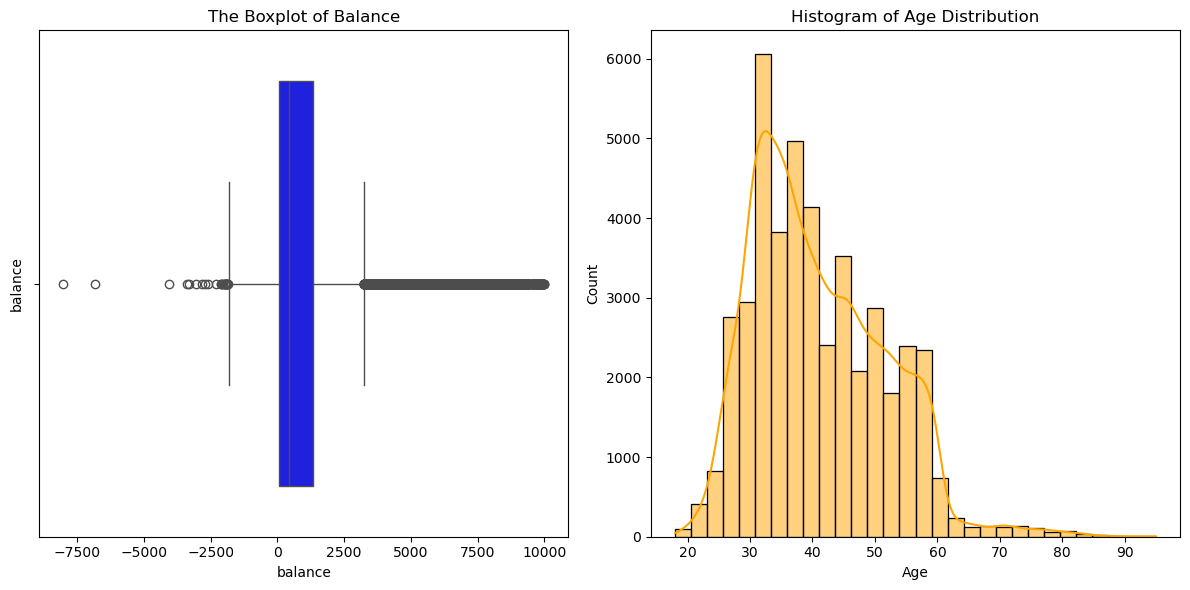

In [9]:
def set_of_visualization(df):

    df = bank_df.copy()

    # Visualization of all
    
    # Boxplot
    fig, axes = plt.subplots(1,2 ,figsize=(12,6))

    sns.boxplot(x=df[df["balance"] < 10000]["balance"], ax=axes[0], color="blue")
    axes[0].set_ylabel("balance")
    axes[0].set_title("The Boxplot of Balance")

    # Kde and frequency of age

    sns.histplot(data=df, x="age", color="orange", kde=True, bins=30, ax=axes[1])
    axes[1].set_xlabel("Age")
    axes[1].set_ylabel("Count")
    axes[1].set_title("Histogram of Age Distribution")

    plt.tight_layout()
    plt.show()

set_of_visualization(bank_df)

In this part of visualization we can see two way:
- The boxplot have so much the outliers out filters the dataset that's continue to give me for the positives or negatives values many and many outliers.In the preprocessing I'm gonna move all this outliers because that's gonna do the model gonna overshift so much. I'm thinks this feature gonna have so much powerfull in the target.
- The histogram we can see the approximative mean age is between **[30:40]**.

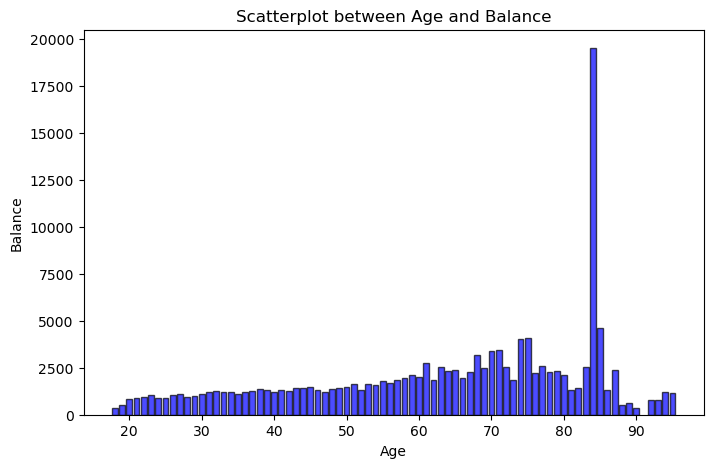

In [11]:
def scatterplot(df):

    df = bank_df.copy()

    # Creation to labels per range
    bins=range(10,100,10)
    labels= [f"{b}-{b+9}]" for b in bins[:-1]] #labels for show range 10 by 10

    # Add new range in the dataframe
    df["age_range"] = pd.cut(df["age"],bins=bins,labels=labels,right=False)

    age_grouped = df.groupby("age")["balance"].mean()

    plt.figure(figsize=(8,5))

    plt.bar(x=age_grouped.index,height=age_grouped.values,color="blue",edgecolor="k",alpha=0.7)
    plt.xlabel("Age")
    plt.ylabel("Balance")
    plt.title("Scatterplot between Age and Balance")

    plt.show()

scatterplot(bank_df)

We can see in the barplot the young people don't have a big balance .I'm thinks because the young don't have much money to take a loan in a bank . But the old peoples have the biggest balance ,I'm thinks the old people save theirs money for the retirement and all we go with have.That's doint have the very extremes anomalies in the dataset. So let see who type range age back more fast theirs money.

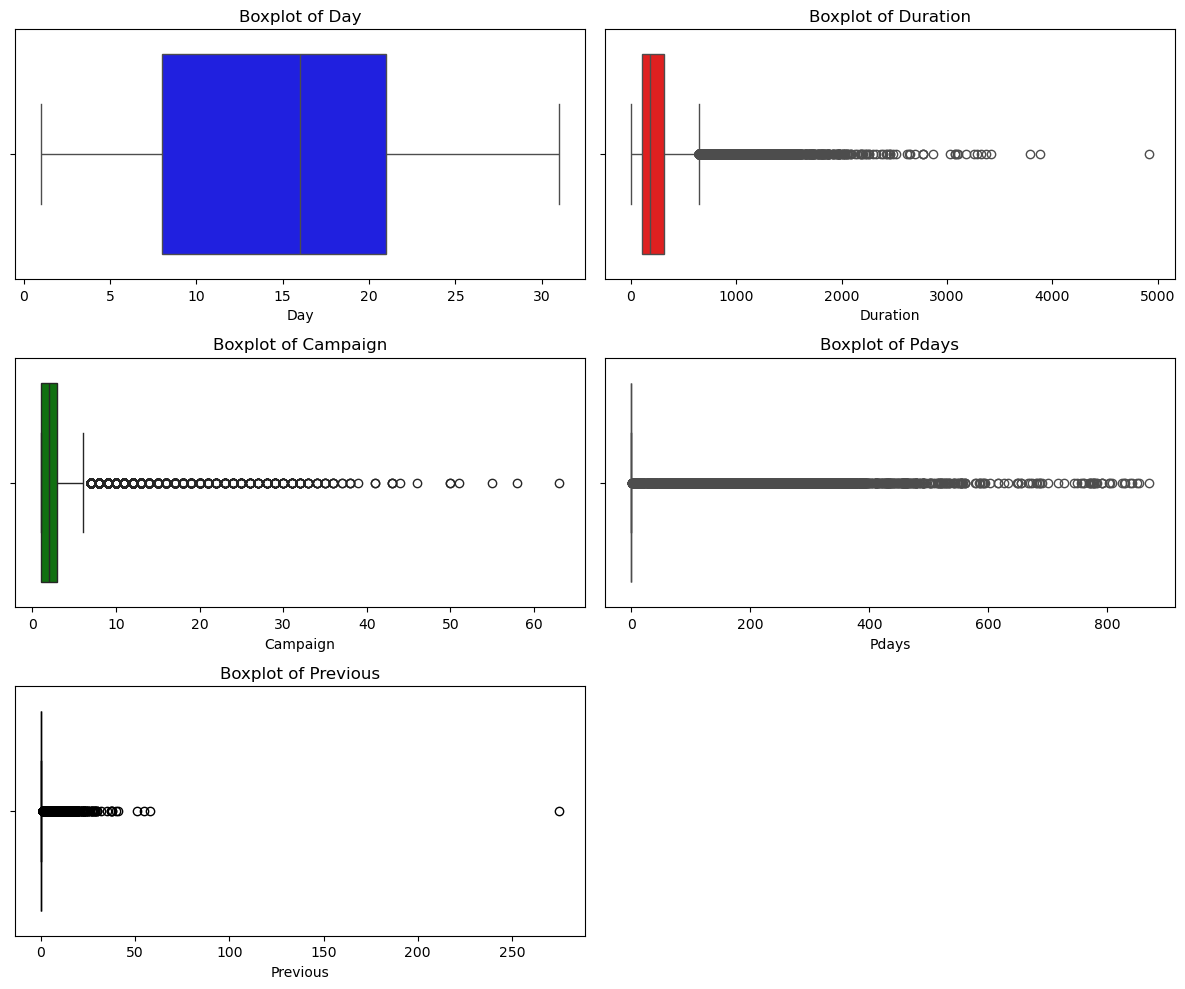

In [16]:
def time_visualization(df):
    
    cols = ["day", "duration", "campaign", "pdays", "previous"]
    colors = ["blue", "red", "green", "gray", "black"] 
    
    fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))
    axes = axes.flatten()  

    
    for i, col in enumerate(cols):
        sns.boxplot(x=df[col], ax=axes[i], color=colors[i])
        axes[i].set_xlabel(col.capitalize())
        axes[i].set_title(f"Boxplot of {col.capitalize()}")

    
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()


time_visualization(bank_df)


We can see we have so much the outliers in the dataset . Many of the columns have so much the ouliers that's gonna biased the model and so much overshift that's not good.So for the next step first we gonna remove the most possible ouliers and second , we gonna use sklearn for pretreatment .So let's start.

### Preprocessing of data

In [22]:
def remove_outliers(df, columns):
    
    df_clean = bank_df.copy()  
    for col in columns:
        Q1 = df_clean[col].quantile(0.25)  
        Q3 = df_clean[col].quantile(0.75)  
        IQR = Q3 - Q1 
        
        lower_bound = Q1 - 1.5 * IQR  
        upper_bound = Q3 + 1.5 * IQR  
        
        df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]
    
    return df_clean

# The columns have the outliers
cols = ["balance", "duration", "campaign"]

bank_df_cleaned = remove_outliers(bank_df, cols)

bank_df_cleaned.describe()

,age,balance,day,duration,campaign,pdays,previous
count,34967.000000,34967.000000,34967.000000,34967.000000,34967.000000,34967.000000,34967.000000
mean,40.618984,638.737781,15.466869,206.430949,2.130180,42.587325,0.590042
std,10.503379,842.436247,8.312563,138.067235,1.318967,103.504469,2.383307
min,18.000000,-1944.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,32.000000,47.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,348.000000,15.000000,171.000000,2.000000,-1.000000,0.000000
75%,48.000000,976.000000,21.000000,280.000000,3.000000,-1.000000,0.000000
max,95.000000,3462.000000,31.000000,635.000000,6.000000,871.000000,275.000000


In [38]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,RobustScaler,StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline

In [27]:
df = bank_df_cleaned.copy() #Don't crush the original dataset

# Convert y in to numeric That's gonna help for the ROC_curve is work only with numerics
df["y"] = df["y"].map({"no": 0, "yes": 1})

col_cat = ["job", "marital", "education", "contact", "month", "poutcome"]
col_num = ["balance", "campaign", "duration", "pdays", "previous", "day"]

X = df[col_num + col_cat]
y = df["y"]

# Pipeline dof preprocessing
prepro = ColumnTransformer(transformers=[
    ("cat", OneHotEncoder(handle_unknown="ignore"), col_cat),
    ("num", Pipeline(steps=[
        ("minmax", MinMaxScaler()),
        ("robust", RobustScaler()),  
        ("standard", StandardScaler())   
    ]), col_num)  
])

### Training data for both models

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=43)

# Transformation of X_train and X_test
X_train_transformed = prepro.fit_transform(X_train).toarray()
X_test_transformed = prepro.transform(X_test).toarray()  

# Features Names
feature_names = prepro.get_feature_names_out()

# Conversion on DataFrame
X_train_transformed = pd.DataFrame(X_train_transformed, columns=feature_names)
X_test_transformed = pd.DataFrame(X_test_transformed, columns=feature_names)

In [75]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score

###  Logistic Regression

**The logistic Regression** is one most popular model in machine learning. It's help to classify one instance to  belongs on particular class. It's use the probality to estimate if one instance is belong one particular class. Often use for the **Bank predictions customers, detect if the email spam or not a spam**.Is good wehn you have 2 instances to predicts because is gonna calculate the instance probaility if is greater than 50% is gonna classify to one class. See now how he perform in this case.

******************** Classification Report for Logistic Regression ********************

              precision    recall  f1-score   support

           0       0.94      0.98      0.96      9584
           1       0.64      0.29      0.40       907

    accuracy                           0.92     10491
   macro avg       0.79      0.64      0.68     10491
weighted avg       0.91      0.92      0.91     10491



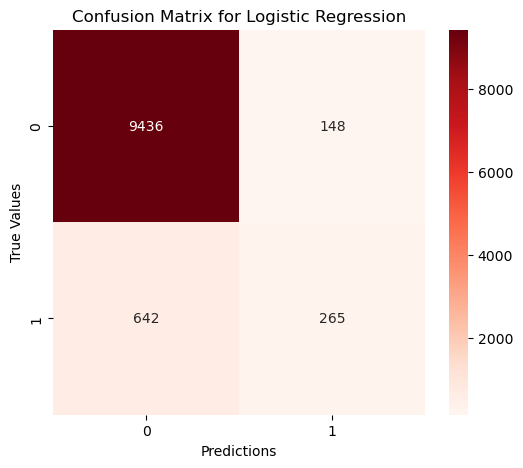

In [44]:
# TRAINING LOGISTIC REGRESSION
logit_model = LogisticRegression(random_state=1,max_iter=1000)
logit_model.fit(X_train_transformed, y_train)

# Prediction
y_pred_logit = logit_model.predict(X_test_transformed)

print(20*"*", "Classification Report for Logistic Regression", 20*"*")
print()
print(classification_report(y_test, y_pred_logit))

# Heatmap for Logistic Regression
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred_logit), annot=True, cmap="Reds", fmt="d")
plt.xlabel("Predictions")
plt.ylabel("True Values")
plt.title("Confusion Matrix for Logistic Regression")
plt.show()

We can see the logistic regression perform instead well with the accuracy 92% is good .The model is good but the problem is the trues peoples are deposing theirs money the model don't predict well. **The precision is not too bad but not good and the recall is too bad**.But what's the **precision**? what's the **recall**? So we gonna explain this now.

### Naive Bayes

**The Naive Bayes** : Is the model use the conditional probability to predict the observing values to give the outcome.It's doing like logistic regression to estimate what type this instance is belong in this class? But the really difference he work with the conditional probability to predict value. In this case we gonna see how is perform and It's better than logistic regression.

******************** Classification Report for Naive Bayes ********************

              precision    recall  f1-score   support

           0       0.95      0.90      0.93      9584
           1       0.35      0.53      0.42       907

    accuracy                           0.87     10491
   macro avg       0.65      0.72      0.67     10491
weighted avg       0.90      0.87      0.88     10491



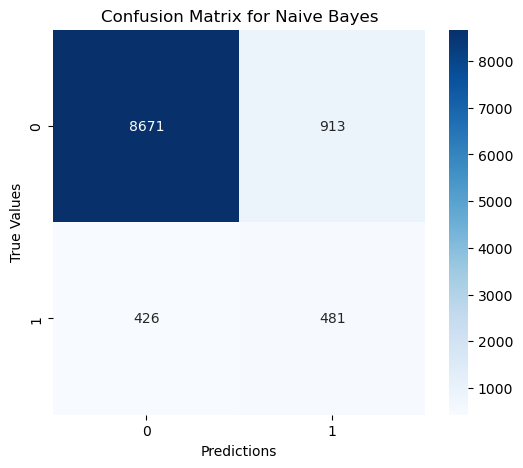

In [46]:
#TRAINING NAÏVE BAYES
nb_model = GaussianNB()
nb_model.fit(X_train_transformed, y_train)

#Predictions
y_pred_nb = nb_model.predict(X_test_transformed)

print(20*"*", "Classification Report for Naive Bayes", 20*"*")
print()
print(classification_report(y_test, y_pred_nb))

# Heatmap for Naive Bayes
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred_nb), annot=True, cmap="Blues", fmt="d")
plt.xlabel("Predictions")
plt.ylabel("True Values")
plt.title("Confusion Matrix for Naive Bayes")
plt.show()

We can see it's not better than logistic regression for this case and is the same problem with the logistic regression . the both don't find very well the people are paying theirs credits. But the recall for this case is better than logistic regression or the precision for the logistic regression is better than Naive bayes.

### Precision and Recall

**The precision** : is the capacity to the model **to find or not miss** the trues values in the model. The question for the precision is how many trues instances the model don't gonna miss? or how many trues instances the model gonna take?. For example: In this model, the model have the capacity to find the peoples are not paying all theirs deposit . It's good, but in the bank the represents want to know what types peoples paying theirs deposits to trust them and give . But if now the model misses them so much like this but is not too bad is 64%, but is not very well so we gonna misses best people for theirs futures loans. To calculate the precision is you're read the in the column for example : We want to know how many people the model find are theirs credit is 265/265+148 .So very important the model can predict them very well.

**The recall** : Is the capacity to the model **to sure or not confuse** the trues values in the model.The question for recall is how really people are the trues instances? or how many trues instances the model don't gonna confuse in the case? For example: In this model, the recall is so weak 29% is too bad the model confuse so much the instances . It's not good because is gonna say this person paying well is credit but is absolutly false the model lied and give bad person for the loan or credit. So too bad in this case. To read the recall is the line you're read for example in this case the recall for the people who's paying their credit is 265/265+642. So is the recall very important metric for the many case.

### ROC_Curve and AUC_Score

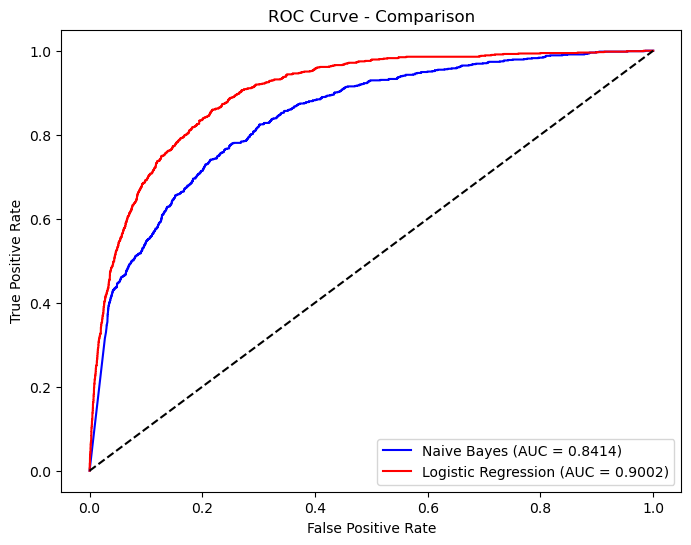

In [48]:
# ROC CURVE FOR BOTH MODELS

y_prob_nb = nb_model.predict_proba(X_test_transformed)[:, 1]
y_prob_logit = logit_model.predict_proba(X_test_transformed)[:, 1]

# ROC Curve
fpr_nb, tpr_nb, _ = roc_curve(y_test, y_prob_nb)
fpr_logit, tpr_logit, _ = roc_curve(y_test, y_prob_logit)

# AUC score
roc_auc_nb = roc_auc_score(y_test, y_prob_nb)
roc_auc_logit = roc_auc_score(y_test, y_prob_logit)

plt.figure(figsize=(8,6))
plt.plot(fpr_nb, tpr_nb, color='blue', label=f'Naive Bayes (AUC = {roc_auc_nb:.4f})')
plt.plot(fpr_logit, tpr_logit, color='red', label=f'Logistic Regression (AUC = {roc_auc_logit:.4f})')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')  
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Comparison')
plt.legend()
plt.show()

We can say officially the logistic regression outperform the Naive Bayes for this case. But the both perform well for this case in the general.

In [71]:
import joblib

joblib.dump(prepro,"pipeline_bank.pkl")

['pipeline_bank.pkl']

### Conclusion

The most importants way to understand are:
- We have so much the outliers in the case
- The both models perform well but Logistic Regression outperform Naive Bayes for this case
- The both models have so much the problem to detect very well the trues values either precision or recall same problem is not good.

We gonna resolve this problem in the future to see how we can boost the precision and recall to take the trues values. The ensemble models like **Random forest and others models boosting** gonna help to adjust the metrics because many of them are so resistants to the outliers.